# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

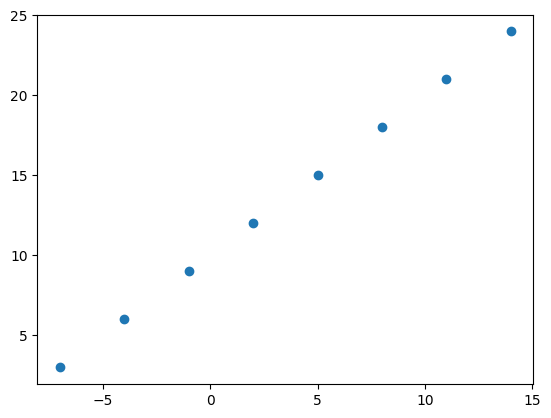

In [2]:
# Create Featuers
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing 
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
house_info

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>

In [6]:
house_price

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>

In [7]:
# Turn the NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in Modelling with TensorFlow

1. **Creating a model**: define the input & output layers, as well as the hidden layers of a deep learning model.
2. **Compilin a model**: define the loss function (in other words, the function which tells the model how wrong it is), the optimizer (tells the model how to improve the patterns its learning) and evaluation metrics (evaluate/interpret the performance of the model).
3. **Fitting a model**: letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae == mean absolute error
             optimizer = tf.keras.optimizers.legacy.SGD(), # sgd == stochastic gradient descent,
             metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10


2023-06-03 20:31:39.212406: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 204ms/step - loss: 14.9197 - mae: 14.9197
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 14.7872 - mae: 14.7872
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 14.6547 - mae: 14.6547
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 14.5222 - mae: 14.5222
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 14.3897 - mae: 14.3897
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 14.2572 - mae: 14.2572
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 14.1247 - mae: 14.1247
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 13.9922 - mae: 13.9922
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 13.8597 - mae: 13.8597
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 13.7272 - mae: 13.7272


In [10]:
# prediction using the model
model.predict([17.0])

1/1 [==============================] - 0s 38ms/step


array([[-0.8454531]], dtype=float32)

## Improving the model
 
The model could be improve by altering the steps that was taken to create the model
 
1. **Creating a model**: add more layers, increase the numbers of hidden units(called neurons) within each of the hiden layers, and change the activation function of each layer.
2. **Compiling the model**: might change the optimization function or the **learning rate** of the optimization function
3. **Fitting the model**:fit the model with more **epochs**(leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Recreating the model 1

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model1.compile(loss = tf.keras.losses.mae, # mae == mean absolute error
             optimizer = tf.keras.optimizers.legacy.SGD(), # sgd == stochastic gradient descent,
             metrics = ["mae"])

# 3. Fit the model
model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 124ms/step - loss: 15.0112 - mae: 15.0112
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.8162 - mae: 14.8162
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 14.6837 - mae: 14.6837
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 14.5512 - mae: 14.5512
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 14.4187 - mae: 14.4187
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 14.2862 - mae: 14.2862
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 14.1537 - mae: 14.1537
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 14.0212 - mae: 14.0212
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8887 - mae: 13.8887
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7562 - mae: 13.7562
Epoch 11/100
1/1 [==============================] - 0s 6m

In [12]:
# prediction using the model
model1.predict([17.0])

1/1 [==============================] - 0s 155ms/step


array([[29.573086]], dtype=float32)

In [13]:
# Recreating the model 2

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss = tf.keras.losses.mae, 
             optimizer = tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics = ["mae"])

# 3. Fit the model
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 375ms/step - loss: 14.0258 - mae: 14.0258
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.9892 - mae: 13.9892
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9526 - mae: 13.9526
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9158 - mae: 13.9158
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8789 - mae: 13.8789
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8421 - mae: 13.8421
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8053 - mae: 13.8053
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7684 - mae: 13.7684
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 13.7316 - mae: 13.7316
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6947 - mae: 13.6947
Epoch 11/100
1/1 [==============================] - 0

In [14]:
# prediction using the model
model2.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[7.6676207]], dtype=float32)

In [15]:
# Recreating the model 3

# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss = tf.keras.losses.mae, 
             optimizer = tf.keras.optimizers.legacy.Adam(lr=0.01),
             metrics = ["mae"])

# 3. Fit the model
model3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 211ms/step - loss: 13.6425 - mae: 13.6425
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8992 - mae: 12.8992
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1609 - mae: 12.1609
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4255 - mae: 11.4255
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6920 - mae: 10.6920
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9589 - mae: 9.9589
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.2244 - mae: 9.2244
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4862 - mae: 8.4862
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7419 - mae: 7.7419
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9892 - mae: 6.9892
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [16]:
# prediction using the model
model3.predict([17.0])

1/1 [==============================] - 0s 43ms/step


array([[26.167791]], dtype=float32)

## Evaluating the model

When it comes to evaluation, we need to

> "Visualize, visualize, Visualize"

It's always a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [17]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make labels for the dataset
y = X + 10

In [18]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

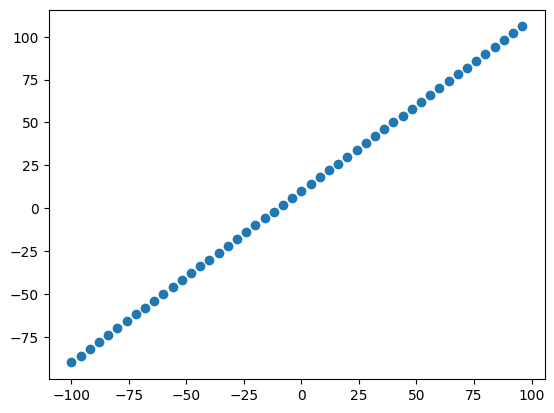

In [20]:
# Visualize the data
plt.scatter(X, y);

### Splitting the dataset

In [21]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [22]:
len(X), len(y)

(50, 50)

In [23]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.legacy.SGD(),
             metrics = ['mae'])

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total no of parameters in the model.
* Trainable params - parameters(patterns) the model can update as it trains.
* Non-trainable params - parameters aren't updated during training (this is typical when you bring in already learn patterns/parameters from other models during **transfer learning**).

In [25]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

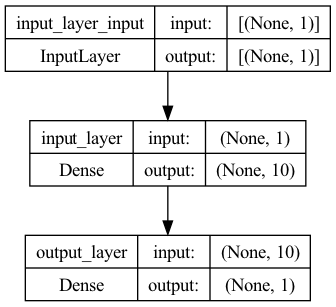

In [26]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to lot them against the ground truth labels. Often in the form of `y_test`/`y_true` versus `y_pred` (ground truth versus model's prediction).

In [27]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 32ms/step


array([[ 91.11863 ],
       [ 97.069176],
       [103.019714],
       [108.97027 ],
       [114.9208  ],
       [120.871346],
       [126.8219  ],
       [132.77243 ],
       [138.72298 ],
       [144.67352 ]], dtype=float32)

In [28]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [29]:
# Creating the Plot Function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, label="Training data")
    plt.scatter(test_data, test_labels, label="Testing data")
    plt.scatter(test_data, predictions, label="Predictions")
    plt.legend()
    plt.show()

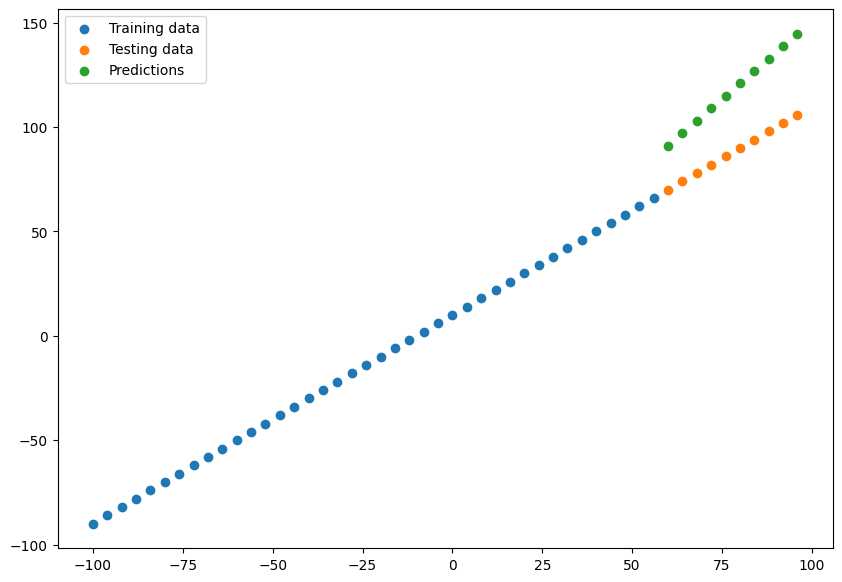

In [30]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluting the model's prediction with regression evaluation metrics

In [31]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 209ms/step - loss: 29.8961 - mae: 29.8961


[29.896076202392578, 29.896076202392578]

In [33]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.896076>

In [34]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=925.1635>

In [36]:
# Calculate the huber
huber = tf.keras.losses.Huber()
huber(y_test, y_pred)
huber

In [37]:
# Make a function to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))